In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle


import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

from sklearn.preprocessing import StandardScaler

import sys
import os
sys.path.append('/'.join(os.getcwd().split('/')[:-2]))
#print(sys.path)
import util.items as items

Using TensorFlow backend.


In [39]:
item = 'Yew_logs'

In [40]:
items.getPrices(item)[-10:]

[293, 290, 289, 289, 290, 292, 290, 286, 281, 277]

In [41]:
items.getInfo(item)

{'members': 'False',
 'edible': 'False',
 'update': '/w/Update:Latest_RuneScape_News_(25_March_2002)',
 'quest': 'No',
 'destroy': 'Drop',
 'image': '/w/File:Yew_logs.png',
 'lowAlch': '64',
 'examine': 'Logs cut from a yew tree',
 'highAlch': '96',
 'storeprice': 'N/A',
 'seller': 'N/A',
 'equipable': 'False',
 'weight': '2.0',
 'released': '25 March 2002',
 'storeCurrency': 'N/A',
 'name': 'Yew_logs',
 'alchable': 'True',
 'exchangePrice': '271',
 'tradeable': 'True',
 'buyLimit': '12000',
 'noteable': 'True',
 'stackable': 'False'}

1290 1319 1290


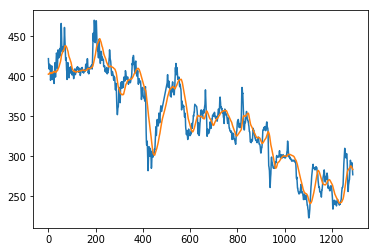

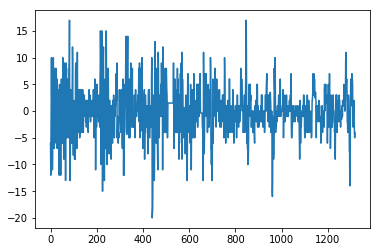

In [42]:
ma = 30
prices = items.getPrices(item)
changes = items.getPriceChanges(item)
movAvg = items.movingAverage(item,ma)
print(len(movAvg),len(prices),len(prices[ma-1:]))
plt.plot(prices[ma-1:])
plt.plot(movAvg)
plt.plot()
plt.show()
plt.plot(changes)
plt.show()

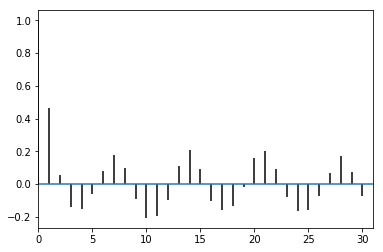

In [43]:
plt.acorr(changes,maxlags=30)
plt.xlim(0,31)
plt.show()

In [44]:
def minMax(data):
    d = []
    ma = max(data)
    mi = min(data)
    for i in range(len(data)):
        d.append((data[i]-mi)/(ma-mi))
    return d

[[-1.32908852]
 [-2.68195658]
 [-0.65265448]
 [ 0.70021358]
 [ 2.27855965]]


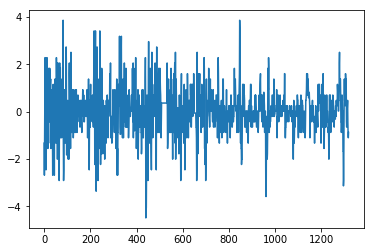

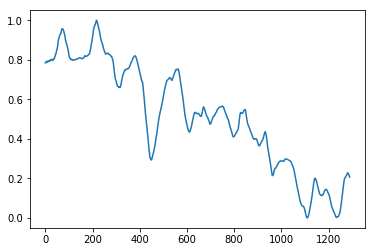

In [45]:
scaler = StandardScaler()
s_changes = scaler.fit_transform(np.array(changes).reshape(-1, 1))
print(s_changes[0:5])
s_movAvg = minMax(movAvg)
plt.plot(s_changes)
plt.show()
plt.plot(s_movAvg)
plt.show()

In [46]:
def classify(d):
    if d>=0:
        return 1
    if d<0:
        return 0
        

In [47]:
x = []
y = []
p = []
size = 10
for i in range(-1*len(s_changes),-1*size,1):
    x.append([a[0] for a in s_changes[i:i+size]])
    y.append(classify(s_changes[i+size]))
    p.append(prices[i+size+1])
print(x[1],y[0])
print(len(x[0]),len(x[-1]))
print(len(x),len(y),len(p))
#y = keras.utils.to_categorical(y, num_classes=2)

[-2.6819565789345408, -0.6526544841892755, 0.7002135789742345, 2.2785596526649963, 0.7002135789742345, 0.9256915895014861, -0.4271764736620238, -2.456478568407289, -1.780044536825534, 0.0237795473924795] 1
10 10
1308 1308 1308


In [48]:
s1 = int(len(y)*.8)
s2  =int(len(y)*.9)
x_train = np.array(x[:s1])
y_train = np.array(y[:s1])
x_val = np.array(x[s1:s2])
y_val = np.array(y[s1:s2])
x_test = np.array(x[s2:])
y_test = np.array(y[s2:])
p_test = np.array(p[s2:])
print(len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test),len(p_test))
print(len(x_train[0]),x_train[0])
print(y_train[0])
print(len(x_test[0]),x_test[0])
print(y_test[0])

1046 1046 131 131 131 131 131
10 [-1.32908852 -2.68195658 -0.65265448  0.70021358  2.27855965  0.70021358
  0.92569159 -0.42717647 -2.45647857 -1.78004454]
1
10 [-0.87813249  0.02377955 -0.20169846  0.02377955  0.02377955 -0.20169846
 -0.42717647 -0.65265448  0.92569159  1.1511696 ]
1


In [49]:
model = Sequential()
model.add(Dense(10, input_dim=size, activation='relu'))
model.add(Dense(10, input_dim=size, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
            validation_data=(x_val,y_val),
            epochs=50,
            batch_size=10)
score = model.evaluate(x_test, y_test, batch_size=1)
print(score)

Train on 1046 samples, validate on 131 samples
Epoch 1/50
1046/1046 [==============================] - 1s 636us/step - loss: 0.7639 - acc: 0.5354 - val_loss: 0.6832 - val_acc: 0.5496
Epoch 2/50
1046/1046 [==============================] - 0s 367us/step - loss: 0.7037 - acc: 0.5497 - val_loss: 0.6831 - val_acc: 0.5649
Epoch 3/50
1046/1046 [==============================] - 0s 346us/step - loss: 0.6802 - acc: 0.5746 - val_loss: 0.6791 - val_acc: 0.6031
Epoch 4/50
1046/1046 [==============================] - 0s 349us/step - loss: 0.6609 - acc: 0.6128 - val_loss: 0.6731 - val_acc: 0.6336
Epoch 5/50
1046/1046 [==============================] - 0s 355us/step - loss: 0.6458 - acc: 0.6386 - val_loss: 0.6673 - val_acc: 0.6565
Epoch 6/50
1046/1046 [==============================] - 0s 359us/step - loss: 0.6343 - acc: 0.6482 - val_loss: 0.6631 - val_acc: 0.6565
Epoch 7/50
1046/1046 [==============================] - 0s 368us/step - loss: 0.6260 - acc: 0.6549 - val_loss: 0.6570 - val_acc: 0.6565
E

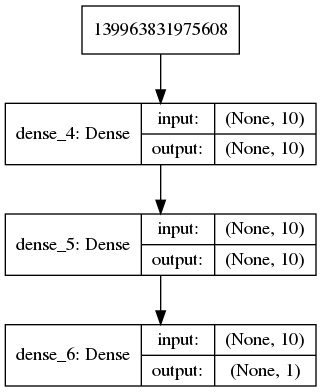

In [51]:
import IPython
keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
IPython.display.Image("test_keras_plot_model.png")

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


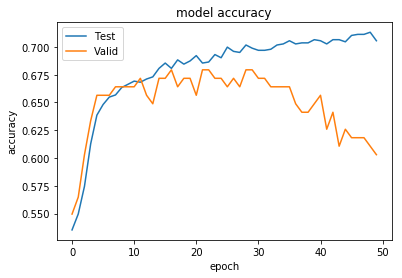

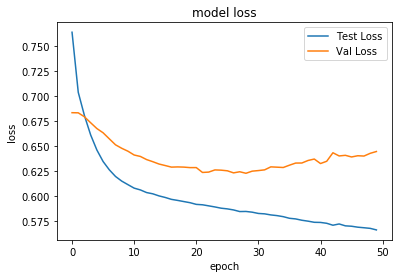

In [52]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],label='Test')
plt.plot(history.history['val_acc'],label='Valid')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='Test Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

[[0.88411224]
 [0.43340683]
 [0.7691996 ]
 [0.5014873 ]
 [0.7054027 ]]


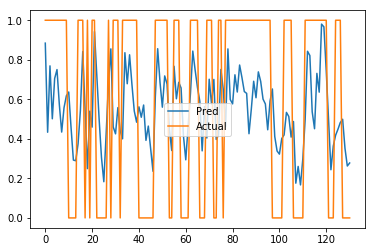

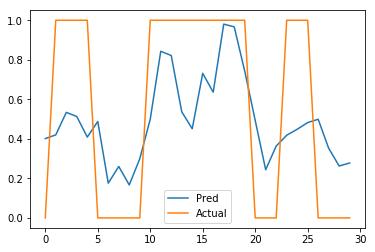

In [53]:
y_pred = model.predict(x_test)
print(y_pred[:5])
plt.plot(y_pred,label='Pred')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()
plt.plot(y_pred[-30:],label='Pred')
plt.plot(y_test[-30:],label='Actual')
plt.legend()
plt.show()

In [74]:
def perfectProfit(changes,data,buyLimit,budget):
    init = budget
    buyLimit = int(buyLimit)
    invent = 0
    profits = []
    for i in range(1,len(changes)):
        if changes[i]==1:
            buy = budget//data[i-1]
            if buy>buyLimit:
                buy = buyLimit
            invent += buy
            budget -= buy * data[i-1]
        else:
            budget += invent * data[i-1]
            invent = 0
        profits.append(((budget + invent * data[i-1]) - init) / init)
    return profits

def buyAndHold(data,buyLimit,budget):
    init = budget
    buyLimit = int(buyLimit)
    invent = 0
    profits = []
    buy = budget//data[0]
    if buy>buyLimit:
        buy = buyLimit
    invent += buy
    budget -= buy * data[0]
    for i in range(len(data)):
        profits.append(((budget+invent * data[i])-init)/init)
    return profits


def modelProfit(thresh,y_pred,data,buyLimit,budget):
    init = budget
    buyLimit = int(buyLimit)
    invent = 0
    profits = []
    for i in range(len(y_pred)):
        y = y_pred[i]
        if y-0.5>thresh:
            buy = budget//data[i]
            if buy>buyLimit:
                buy = buyLimit
            invent += buy
            budget -= buy * data[i]
        if y<0.5:
            budget += invent * data[i]
            invent = 0
        profits.append(((budget + invent * data[i]) - init) / init)
    return profits

def persistanceProfit(changes,data,buyLimit,budget):
    init = budget
    buyLimit = int(buyLimit)
    invent = 0
    profits = []
    for i in range(1,len(changes)):
        if changes[i-1]==1:
            buy = budget//data[i]
            if buy>buyLimit:
                buy = buyLimit
            invent += buy
            budget -= buy * data[i]
        else:
            budget += invent * data[i]
            invent = 0
        profits.append(((budget + invent * data[i]) - init) / init)
    profits.append(((budget + invent * data[i]) - init) / init)
    return profits

In [75]:
bl = int(items.getInfo(item)['buyLimit'])
print(len(x_test),len(y_test),len(p_test))
budgets = [10**5,10**6,10**7,10**8,10**9]
mpBest = [([-100],-1)] * len(budgets)
ppBest = [[-100]] * len(budgets)
bhBest = [[-100]] * len(budgets)
perBest = [[-100]] * len(budgets)
yp = model.predict(x_test)
for b in range(len(budgets)):
    print(budgets[b])
    t = 0
    bhBest[b] = buyAndHold(p_test,bl,budgets[b])
    ppBest[b] = perfectProfit(y_test,p_test,bl,budgets[b])
    perBest[b] = persistanceProfit(y_test,p_test,bl,budgets[b])
    for i in range(10):
        mp = modelProfit(t,yp,p_test,bl,budgets[b])
        if mp[-1]>mpBest[b][0][-1] and mp[-1]!=0.0:
            mpBest[b] = (mp,t)
        t += .02

131 131 131
100000
1000000
10000000
100000000
1000000000


In [76]:
for b in range(len(budgets)):
    print(budgets[b])
    print('\tModel\n\t',mpBest[b][0][-1],mpBest[b][1])
    print('\tPersistance\n\t',perBest[b][-1])
    print('\tPerfect\n\t',ppBest[b][-1])
    print('\tBuy and Hold\n\t',bhBest[b][-1])

100000
	Model
	 0.29276 0.16
	Persistance
	 0.0915
	Perfect
	 0.59193
	Buy and Hold
	 0.59365
1000000
	Model
	 0.293259 0.16
	Persistance
	 0.091188
	Perfect
	 0.592036
	Buy and Hold
	 0.593805
10000000
	Model
	 0.13805985 0.08
	Persistance
	 0.0920573
	Perfect
	 0.45626115
	Buy and Hold
	 0.186
100000000
	Model
	 0.0195 0.04
	Persistance
	 0.0456
	Perfect
	 0.1212
	Buy and Hold
	 0.0186
1000000000
	Model
	 0.00195 0.04
	Persistance
	 0.00456
	Perfect
	 0.01212
	Buy and Hold
	 0.00186


131 131 130 131


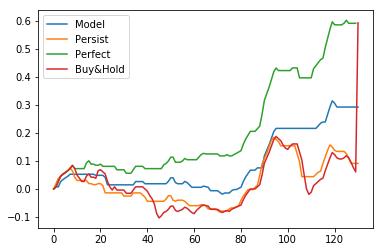

131 131 130 131


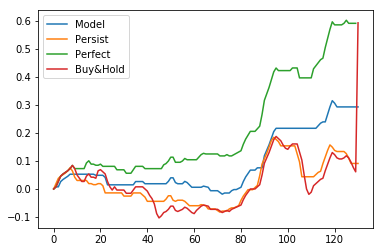

131 131 130 131


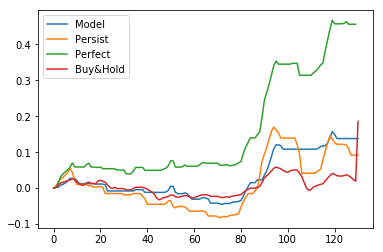

131 131 130 131


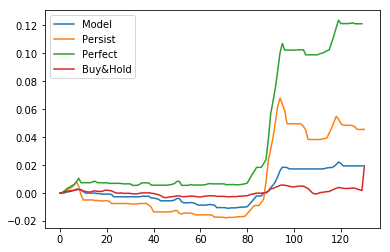

131 131 130 131


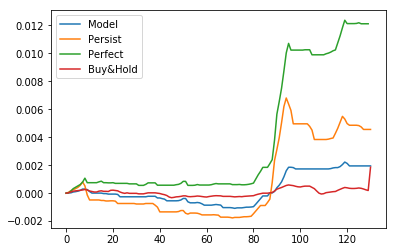

In [77]:
for b in range(len(budgets)):
    print(len(mpBest[b][0]),len(perBest[b]),len(ppBest[b]),len(bhBest[b]))
    plt.plot(mpBest[b][0],label='Model')
    plt.plot(perBest[b],label='Persist')
    plt.plot(ppBest[b],label='Perfect')
    plt.plot(bhBest[b],label='Buy&Hold')
    plt.legend()
    plt.show()